<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Optimización con enjambre de partículas (Particle Swarm Optimization)

## Introducción

La optimización por enjambre de partículas (*Particle Swarm Optimization, PSO*) es un método de optimización heurística orientado a encontrar mínimos o máximos globales. Su funcionamiento está inspirado en el comportamiento que tienen las bandadas de pájaros o bancos de peces en los que, el movimiento de cada individuo (dirección, velocidad, aceleración...), es el resultado de combinar las decisiones individuales de cada uno con el comportamiento del resto.

> *El método de enjambre de partículas es solo una de las muchas estrategias de optimización heurística que existen, una alternativa común son los algoritmos genéticos.*

> *La optimización heurística no tiene por qué ser la forma de optimización más adecuada en todos los escenarios. Si el problema en cuestión puede optimizarse de forma analítica, suele ser más adecuado resolverlo de esta forma.*

> *La implementación de algoritmo que se muestra en este documento pretende ser lo más explicativa posible aunque para ello no sea la más eficiente.*


## Algoritmo 
<a name="Algoritmo"></a>

Aunque existen variaciones, algunas de las cuales se describen a lo largo de este documento, en términos generales, la estructura de un algoritmo *PSO* para optimizar (maximizar o minimizar) una función con una o múltiples variables sigue los siguientes pasos:

---

1. Crear un enjambre inicial de $n$ partículas aleatorias. Cada partícula consta de 4 elementos: una posición que representa una determinada combinación de valores de las variables, el valor de la función objetivo en la posición donde se encuentra la partícula, una velocidad que indica cómo y hacia donde se desplaza la partícula, y un registro de la mejor posición en la que ha estado la partícula hasta el momento.
<br><br>

2. Evaluar cada partícula con la función objetivo.
<br><br>

3. Actualizar la posición y velocidad de cada partícula. Esta es la parte que proporciona al algoritmo la capacidad de optimización. En el apartado **Mover partícula** se describe con detalle el proceso.
<br><br>

5. Si no se cumple un criterio de parada, volver al paso 2.

---


### Crear partícula
<a name="partícula"></a>

Cada partícula está definida por una posición, velocidad y valor que varían a medida que la partícula se mueve. Además, también almacena la mejor posición en la que ha estado hasta el momento. Cuando se crea aun nueva partícula, únicamente se dispone de información sobre su posición y velocidad (normalmente iniciada como cero), el resto de valores no se conocen hasta que la partícula es evaluada.

### Evaluar partícula
<a name="Evaluar partícula"></a>

Evaluar una partícula consiste en calcular el valor de la función objetivo en la posición que ocupa la partícula es ese momento. Cada partícula almacena también la posición con mejor valor en la que ha estado hasta el momento. Para poder identificar
si una nueva posición es mejor que las anteriores, es necesario conocer si se trata de un problema de minimización o maximización.

### Mover partícula
<a name="Mover partícula"></a>

Mover una partícula implica actualizar su velocidad y posición. Este paso es el más importante ya que otorga al algoritmo la capacidad de optimizar.

La velocidad de cada partícula del enjambre se actualiza empleando la siguiente ecuación:

$$v_i(t+1) = wv_i(t) + c_1r_1[\hat{x}_i(t) - x_i(t)] + c_2r_2[g(t) - x_i(t)]$$

donde:

+ $v_i(t+1)$: velocidad de la partícula $i$ en el momento $t + 1$, es decir, la nueva velocidad.
+ $v_i(t)$: velocidad de la partícula $i$ en el momento $t$, es decir, la velocidad actual.
+ $w$: coeficiente de inercia, reduce o aumenta a la velocidad de la partícula.
+ $c_1$: coeficiente cognitivo.
+ $r_1$: vector de valores aleatorios entre 0 y 1 de longitud igual a la del vector velocidad.
+ $\hat{x}_i(t)$: mejor posición en la que ha estado la partícula $i$ hasta el momento.
+ $x_i(t)$: posición de la partícula $i$ en el momento $t$.
+ $c_2$: coeficiente social.
+ $r_2$: vector de valores aleatorios entre 0 y 1 de longitud igual a la del vector velocidad.
+ $g(t)$: posición de todo el enjambre en el momento $t$, el mejor valor global.
<br>

Para comprender como se relaciona esta ecuación con el movimiento de la partícula, resulta útil diferenciar tres partes:

+ $wv_i(t)$ es la componente de inercia, responsable de mantener a la partícula moviéndose en la dirección en la que lo ha estado haciendo hasta el momento. El valor recomendado del coeficiente de inercia $w$ suele ser entre 0.8 y 1.2. Si $w<1$, la partícula se va desacelerando a medida que avanzan las iteraciones, esto se traduce en menor exploración pero una convergencia hacia el óptimo más rápida. Si $w>1$, la partícula se va acelerando, lo que permite explorar más zonas del espacio de la función pero dificulta la convergencia.
<br><br>

+ $c_1r_1[\hat{x}_i(t) - x_i(t)]$ es la componente cognitiva, responsable de que la partícula tienda a moverse hacia la posición donde ha obtenido mejores resultados hasta el momento. El coeficiente cognitivo $c_1$ suele estar acotado en el rango [0, 2], siendo 2 el valor recomendado. $r_1$ es un vector de valores aleatorios entre 0 y 1 (un valor por cada dimensión) que aporta cierto comportamiento estocástico al movimiento de las partículas, mejorando así la capacidad de escapar de mínimos locales.
<br><br>

+ $c_2r_2[g(t) - x_i(t)]$ es la componente social, responsable de que la partícula tienda a moverse hacia la mejor posición encontrada por el enjambre hasta el momento. Puede interpretarse como el "conocimiento colectivo". El valor del coeficiente social $c_2$ suele estar acotado en el rango [0, 2], siendo 2 el valor recomendado. $r_2$ es un vector de valores aleatorios entre 0 y 1 (un valor por cada dimensión) que aporta cierto comportamiento estocástico al movimiento de las partículas, mejorando así la capacidad de escapar de mínimos locales.
<br><br>

+ La magnitud relativa entre la componente cognitiva y la componente social permite regular el comportamiento exploratorio del algoritmo. Cuanto mayor es el valor de $c_1$ respecto a $c_2$, mayor independencia de movimiento tiene cada partícula, lo que permite mayor exploración pero mayor lentitud en la convergencia. Por el contrario, cuanto mayor es el valor de $c_2$ respecto a $c_1$, más obligadas están las partículas a moverse hacia la mejor región encontrada hasta el momento, lo que reduce la exploración pero acelera la convergencia.
<br><br>

+ En algunas versiones del algoritmo, $r_1$ y $r_2$ son escalares en lugar de vectores. Multiplicar cada componente de la velocidad por un valor aleatorio distinto añade mayores fluctuaciones al movimiento de las partículas, lo que, aun a riesgo de retrasar la convergencia, suele generar mejores resultados.

Una vez calculada la nueva velocidad, se puede actualizar la posición de la partícula con la ecuación:

$$x_i(t+1) = x_i(t) + v_i(t+1)$$
<br>

Uno de los principales problemas del algoritmo *PSO* es que las partículas suelen adquirir velocidades excesivamente altas, lo que les lleva a salirse de los límites del espacio de búsqueda o a que sean incapaces de converger en la región óptima. Es en este paso del algoritmo donde más investigaciones y adaptaciones se han hecho. Algunas de las soluciones son:

+ Limitar la velocidad máxima que puede alcanzar una partícula. Siendo [$x_{min}$, $x_{max}$] los límites inferior y superior del espacio de búsqueda de cada variable, la velocidad máxima que puede alcanzar la partícula en esa dirección es $v_{max} = k(x_{max} - x_{min})/2$, donde $k$ suele ser un valor entre 0.1 y 1.
<br><br>

+ Si el valor de alguna de las variables excede los límites impuestos, se sobrescribe con el valor del límite correspondiente y se reinicia su velocidad a cero. 
<br><br>

+ Reducción lineal del coeficiente de inercia $w$. Esta estrategia consiste en ir reduciendo el coeficiente de inercia a medida que avanzan las iteraciones. En las primeras iteraciones, las partículas tiene mucha capacidad de exploración y, a medida que avanza el proceso, va reduciéndose su velocidad favoreciendo la convergencia. Puede conseguirse este efecto con la ecuación:

$$w_t = (w_{max} - w_{min}) \frac{t_{max} -t}{t_{max}} + w_{min}$$

donde:

+ $w_{t}$: coeficiente de inercia en la iteración $t$.
+ $w_{max}$: coeficiente de inercia máximo. Valor con el que se inicia el algoritmo. Valor recomendado de 0.9.
+ $w_{min}$: coeficiente de inercia mínimo. Valor que se alcanza en la última iteración. Valor recomendado de 0.4.
+ $t_{max}$: número máximo de iteraciones.
<br><br>

La siguiente función actualiza la posición de una partícula teniendo en cuenta su posición y velocidad actual, la mejor posición global encontrada por el enjambre, los coeficientes de inercia, cognitivo, social, y los límites de búsqueda.

### Implementación

In [2]:
# python implementation of particle swarm optimization (PSO)
# minimizing rastrigin and sphere function

import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys # max float


#particle class
class Particle:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)

        # initialize position of the particle with 0.0 value
        self.position = [0.0 for i in range(dim)]

        # initialize velocity of the particle with 0.0 value
        self.velocity = [0.0 for i in range(dim)]

        # initialize best particle position of the particle with 0.0 value
        self.best_part_pos = [0.0 for i in range(dim)]

        # loop dim times to calculate random position and velocity
        # range of position and velocity is [minx, max]
        for i in range(dim):
            self.position[i] = ((maxx - minx)*self.rnd.random() + minx)
            self.velocity[i] = ((maxx - minx)*self.rnd.random() + minx)

        # compute fitness of particle
        self.fitness = fitness(self.position) # curr fitness

        # initialize best position and fitness of this particle
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness # best fitness

    # particle swarm optimization function
    def pso(fitness, max_iter, n, dim, minx, maxx):
        # hyper parameters
        w = 0.729 # inertia
        c1 = 1.49445 # cognitive (particle)
        c2 = 1.49445 # social (swarm)

        rnd = random.Random(0)

        # create n random particles
        swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]

        # compute the value of best_position and best_fitness in swarm
        best_swarm_pos = [0.0 for i in range(dim)]
        best_swarm_fitnessVal = sys.float_info.max # swarm best

        # computer best particle of swarm and it's fitness
        for i in range(n): # check each particle
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)

        # main loop of pso
        Iter = 0
        best_swarm_pos_hist = {}
        best_swarm_fitnessVal_hist = {}
        
        while Iter < max_iter:

            # after every 10 iterations
            # print iteration number and best fitness value so far
            best_swarm_pos_hist[Iter] = best_swarm_pos
            best_swarm_fitnessVal_hist[Iter] = best_swarm_fitnessVal
            if Iter % 10 == 0 and Iter > 1:
                print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
                print(f'best_position: {best_swarm_pos}')

            for i in range(n): # process each particle

                # compute new velocity of curr particle
                for k in range(dim):
                    r1 = rnd.random() # randomizations
                    r2 = rnd.random()

                    swarm[i].velocity[k] = (
                                            (w * swarm[i].velocity[k]) +
                                            (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                                            (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                                        )


                    # if velocity[k] is not in [minx, max]
                    # then clip it
                    if swarm[i].velocity[k] < minx:
                        swarm[i].velocity[k] = minx
                    elif swarm[i].velocity[k] > maxx:
                        swarm[i].velocity[k] = maxx


                # compute new position using new velocity
                for k in range(dim):
                    swarm[i].position[k] += swarm[i].velocity[k]

                # compute fitness of new position
                swarm[i].fitness = fitness(swarm[i].position)

                # is new position a new best for the particle?
                if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                    swarm[i].best_part_fitnessVal = swarm[i].fitness
                    swarm[i].best_part_pos = copy.copy(swarm[i].position)

                # is new position a new best overall?
                if swarm[i].fitness < best_swarm_fitnessVal:
                    best_swarm_fitnessVal = swarm[i].fitness
                    best_swarm_pos = copy.copy(swarm[i].position)

            # for-each particle
            Iter += 1
        #end_while
        return best_swarm_pos, best_swarm_pos_hist, best_swarm_fitnessVal_hist
        # end pso


#----------------------------


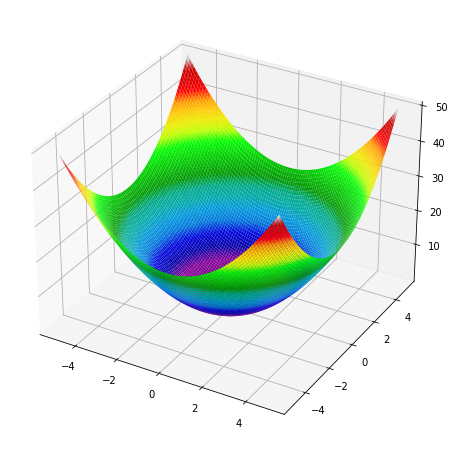

In [4]:
#sphere function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2) + (Y**2)
 
fig = plt.figure(figsize=(8,8)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0.08,  antialiased=True)

plt.show()

In [5]:
#sphere function
def fitness_sphere(position):
    fitnessVal = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitnessVal += (xi*xi);
    return fitnessVal;
#-------------------------



Begin particle swarm optimization on sphere function

Goal is to minimize sphere function in 3 variables
Function has known min = 0.0 at (0, 0, 0)
Setting num_particles = 50
Setting max_iter = 50

Starting PSO algorithm

Iter = 10 best fitness = 9.700
best_position: [-2.9630748834423475, -0.9265827282085155, 0.24888729848817803]
Iter = 20 best fitness = 1.762
best_position: [0.8329520566661022, 0.337028753377441, -0.9768415963276653]
Iter = 30 best fitness = 0.131
best_position: [0.031269328636747196, -0.3306817487748161, 0.14450520625300944]
Iter = 40 best fitness = 0.032
best_position: [-0.0060663013692408745, -0.024518290523857365, 0.17839112890983058]

PSO completed


Best solution found:
['-0.006238', '0.002933', '0.178581']
fitness of best solution = 0.031939

End particle swarm for sphere function



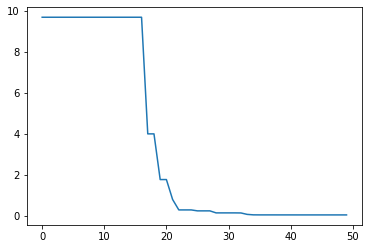

In [8]:

# Driver code for Sphere function
print("\nBegin particle swarm optimization on sphere function\n")
dim = 3
fitness = fitness_sphere


print("Goal is to minimize sphere function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
    print("0, ", end="")
print("0)")

num_particles = 50
max_iter = 50

print("Setting num_particles = " + str(num_particles))
print("Setting max_iter = " + str(max_iter))
print("\nStarting PSO algorithm\n")



best_position,best_pos_hist, best_fitnessVal_hist = Particle.pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)

print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)

print("\nEnd particle swarm for sphere function\n")

import matplotlib.pyplot as plt
lists=sorted(best_fitnessVal_hist.items())
x,y=zip(*lists)
plt.figure(figsize=(6,4))
plt.plot(x,y)

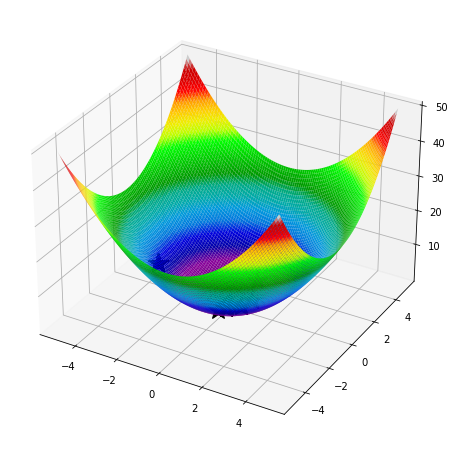

In [9]:
#sphere function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2) + (Y**2)
 
fig = plt.figure(figsize=(8,8)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0.08,  antialiased=True)
for i in range(len(best_pos_hist)):
    plt.plot(best_pos_hist[i][0], best_pos_hist[i][1], best_fitnessVal_hist[i],'*k', ms=20)
plt.show()

## Ejemplo 2

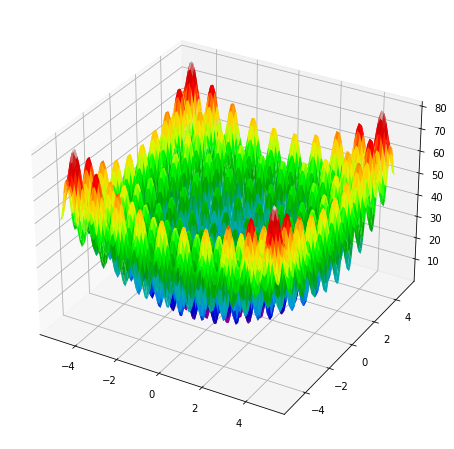

In [10]:
# rastrigin function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
 
fig = plt.figure(figsize=(8,8)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0.08,  antialiased=True)

plt.show()

In [11]:
#-------fitness functions---------

# rastrigin function
def fitness_rastrigin(position):
    fitnessVal = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitnessVal += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
    return fitnessVal



Begin particle swarm optimization on rastrigin function

Goal is to minimize Rastrigin's function in 2 variables
Function has known min = 0.0 at (0, 0)
Setting num_particles = 50
Setting max_iter = 100

Starting PSO algorithm

Iter = 10 best fitness = 4.051
best_position: [-0.9489385002776625, 0.1180438318817143]
Iter = 20 best fitness = 4.051
best_position: [-0.9489385002776625, 0.1180438318817143]
Iter = 30 best fitness = 4.051
best_position: [-0.9489385002776625, 0.1180438318817143]
Iter = 40 best fitness = 2.384
best_position: [-0.9207817643587699, 0.04046044140897634]
Iter = 50 best fitness = 1.145
best_position: [-0.9880450331799188, 0.02667747510522191]
Iter = 60 best fitness = 1.139
best_position: [-0.9901673941096628, 0.026569578631977092]
Iter = 70 best fitness = 1.136
best_position: [-0.9881813019153698, 0.0257761708070182]
Iter = 80 best fitness = 1.134
best_position: [-0.9880435720609223, 0.025626544912487836]
Iter = 90 best fitness = 1.134
best_position: [-0.988037733532

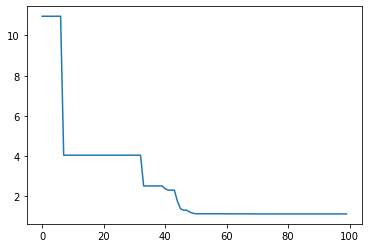

In [15]:
# Driver code for rastrigin function

print("\nBegin particle swarm optimization on rastrigin function\n")
dim = 2
fitness = fitness_rastrigin


print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
    print("0, ", end="")
print("0)")

num_particles = 50
max_iter = 100

print("Setting num_particles = " + str(num_particles))
print("Setting max_iter = " + str(max_iter))
print("\nStarting PSO algorithm\n")



best_position,best_pos_hist, best_fitnessVal_hist = Particle.pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)

print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)

print("\nEnd particle swarm for rastrigin function\n")

import matplotlib.pyplot as plt
lists=sorted(best_fitnessVal_hist.items())
x,y=zip(*lists)
plt.figure(figsize=(6,4))
plt.plot(x,y)

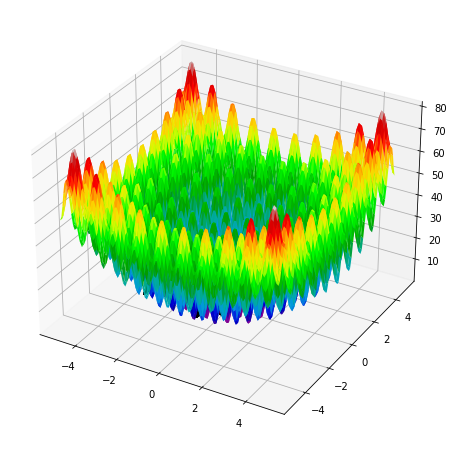

In [16]:
# rastrigin function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
 
fig = plt.figure(figsize=(8,8)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0.08,  antialiased=True)
for i in range(len(best_pos_hist)):
    plt.plot(best_pos_hist[i][0], best_pos_hist[i][1], best_fitnessVal_hist[i],'*k', ms=50)
plt.show()

### Actividad

In [ ]:
def objective_function(x, y, func_name):
  # Sorted in order of difficulty
  # More can be found at https://en.wikipedia.org/wiki/Test_functions_for_optimization
  return {
    'booth': (
      (x + 2 * y - 7)**2 + (2 * x + y -5)**2
    ),
    'beale': (
      (1.5 - x + x * y)**2 +(2.25 - x + x * y**2)**2 +
      (2.625 - x + x * y**3)**2
    ),
    'drop_wave': (
      -(1 + np.cos(12*np.sqrt(np.square(x)+np.square(y)))) /
      ((np.square(x) + np.square(y))/2 +1)
    ),
    'himmelblau': (
      (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    ),
    'eggholder': (
      -(y + 47) * np.sin(np.sqrt(np.absolute((x / 2)+(y + 47)))) - x * np.sin(np.sqrt(np.absolute(x - (y + 47))))
    )
  }.get(func_name)

# Surface Plot
num_samples = 30
x, y = np.meshgrid(
  np.linspace(lower_bound, upper_bound, num_samples),
  np.linspace(lower_bound, upper_bound, num_samples)
)
z = np.zeros(num_samples ** 2).reshape(30, 30) #30 arrays with 30 elemenets each
z = objective_function(x, y, 'eggholder')

fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(x, y, z, cmap = "viridis", linewidth = 0, antialiased = True)
fig.colorbar(surf, shrink = 0.5, aspect = 5)